# 建立森林

# 1. 导包

In [1]:
%matplotlib inline 
# 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

# 2. 导入需要的数据集

In [2]:
wine = load_wine()

wine.data
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# 3. sklearn建模的基本流程

In [3]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r)
     )

Single Tree:0.9074074074074074 Random Forest:0.9814814814814815


# 4. 画出随机森林和决策树在一组交叉验证下的效果对比

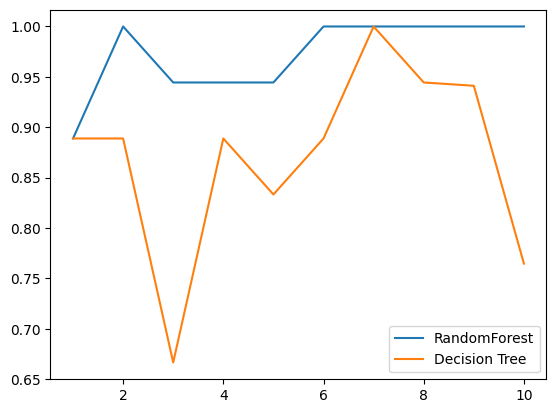

'\nlabel = "RandomForest"\nfor model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:\n   score = cross_val_score(model,wine.data,wine.target,cv=10)\n   print("{}:".format(label)),print(score.mean())\n   plt.plot(range(1,11),score,label = label)\n   plt.legend()\n   label = "DecisionTree"\n'

In [4]:
#目的是带大家复习一下交叉验证
#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
# 实例化好的模型，完整的未分列的特征矩阵，完整的标签，交叉验证次数
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")

plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

RandomForest:
0.9666666666666668
DecisionTree:
0.8761437908496731


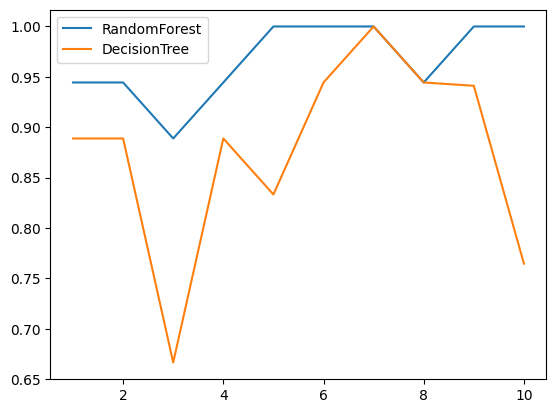

In [5]:
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
   score = cross_val_score(model,wine.data,wine.target,cv=10)
   print("{}:".format(label)),print(score.mean())
   plt.plot(range(1,11),score,label = label)
   plt.legend()
   label = "DecisionTree"

# 5. 画出随机森林和决策树在十组交叉验证下的效果对比

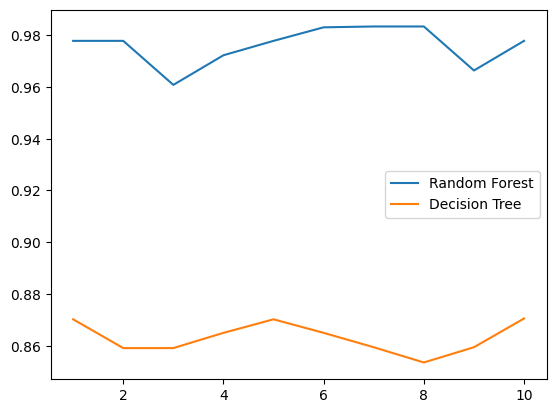

In [6]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

# 6. n_estimators的学习曲线

0.9555555555555555 9


ValueError: x and y must have same first dimension, but have shapes (200,) and (10,)

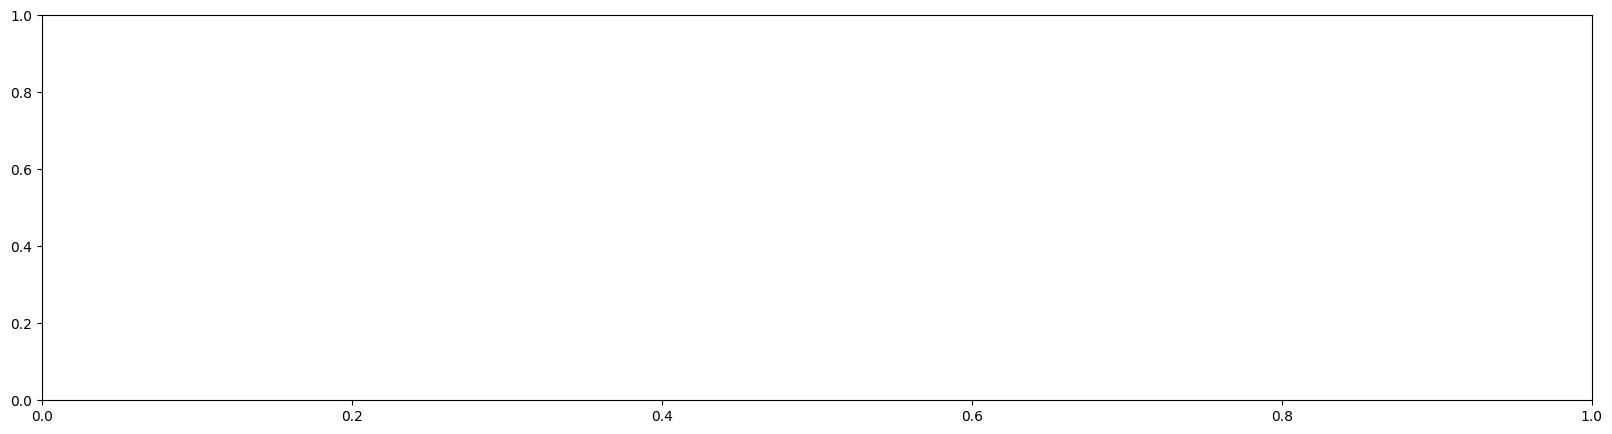

In [13]:
superpa = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [12]:
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [15]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2) 
rfc = rfc.fit(Xtrain, Ytrain)

In [17]:
rfc.estimators_[0].random_state 
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


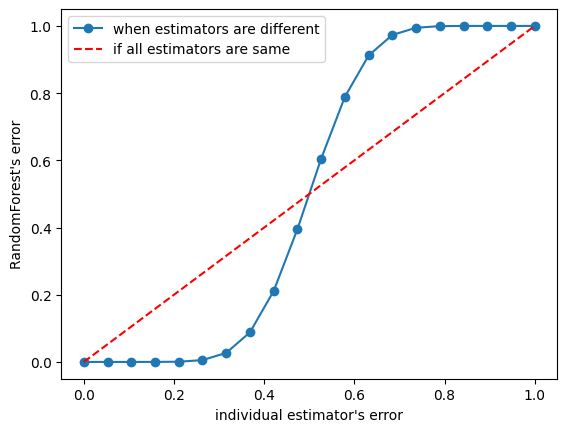

In [18]:
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
iris = load_iris()

regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, iris.data, iris.target, cv=10
               ,scoring = "neg_mean_squared_error")
import sklearn.metrics as tr
sorted(tr.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',